> ## Demo (Matplotlib Wrapper Library)

---

In [1]:
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import viz

In [2]:
revenue = [random.randint(1e6, 1e8) for _ in range(20)]
fy_qtr = ["Q1-16", "Q2-16", "Q3-16", "Q4-16",
          "Q1-17", "Q2-17", "Q3-17", "Q4-17",
          "Q1-18", "Q2-18", "Q3-18", "Q4-18",
          "Q1-19", "Q2-19", "Q3-19", "Q4-19",
          "Q1-20", "Q2-20", "Q3-20", "Q4-20"]
normal_dist = np.random.normal(size=20).tolist()

df = pd.DataFrame({"Revenue":revenue,
                   "Quarter":fy_qtr,
                   "Random":normal_dist})

> ### viz.plot

---

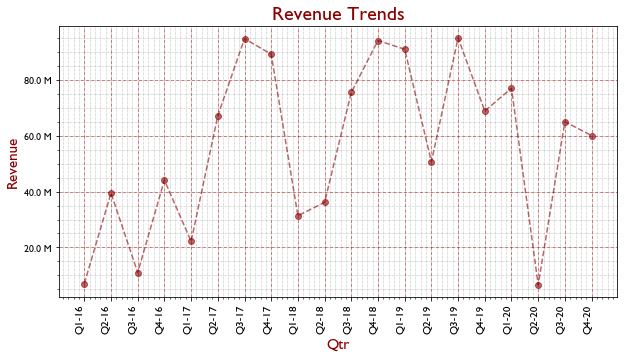

In [3]:
f, axe = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
viz.plot(df["Quarter"], 
         df["Revenue"], 
         ax=axe,
         title="Revenue Trends",
         xlabel="Qtr",
         ylabel="Revenue", 
         ls="--", 
         marker="o", 
         color="darkred")

> ### viz.scatter

---

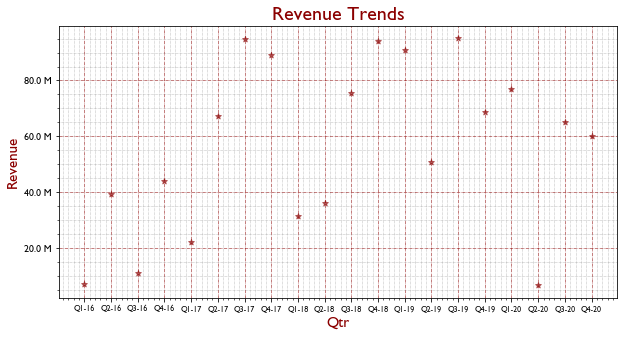

In [4]:
f, axe = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
viz.scatter_plot(df["Quarter"], 
                 df["Revenue"], 
                 ax=axe,
                 title="Revenue Trends",
                 xlabel="Qtr",
                 ylabel="Revenue", 
                 color="darkred", 
                 marker="*")

> ### viz.plot_histogram

---

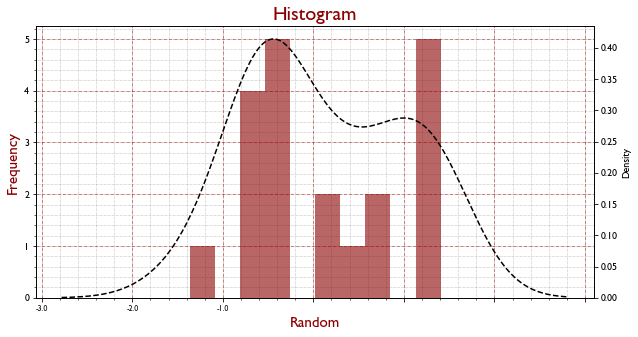

In [5]:
f, axe = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
viz.plot_histogram(df["Random"],
                   ax=axe,
                   title="Histogram",
                   xlabel="Random",
                   ylabel="Frequency",
                   color="darkred", 
                   kde=True)

plt.show()

> ### viz.plot_pdf_and_cdf

---

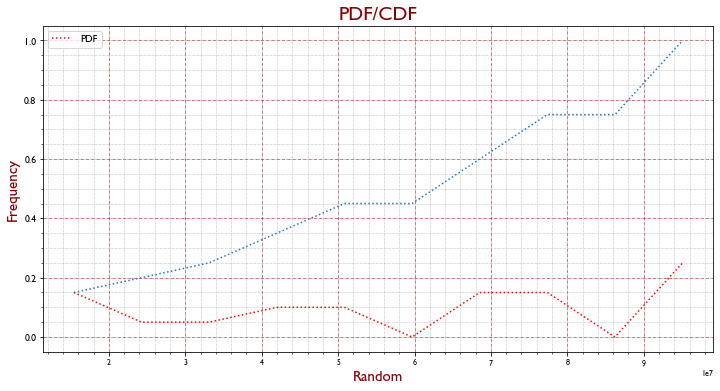

In [6]:
f, axe = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
viz.plot_pdf_and_cdf(df["Revenue"],
                     ax=axe,
                     title="PDF/CDF",
                     xlabel="Random",
                     ylabel="Frequency",
                     ls=":")

> ###  viz.plot_grouped_bars

---

In [22]:
df["Year"] = df["Quarter"].apply(lambda x: "20" + x[-2:])

type_ = ["Electronic", "Paper"] * 10
random.shuffle(type_)
df["Type"] = type_

#### Demo input data

In [31]:
input_ = df.groupby(["Year", "Type"])["Revenue"].sum().reset_index().pivot_table(index="Year", columns="Type", values="Revenue").fillna(2e7).reset_index()
input_

Type,Year,Electronic,Paper
0,2016,143986570.0,125783005.0
1,2017,94281525.0,55967384.0
2,2018,127822365.0,20000000.0
3,2019,19328486.0,238535622.0
4,2020,32437020.0,171774841.0


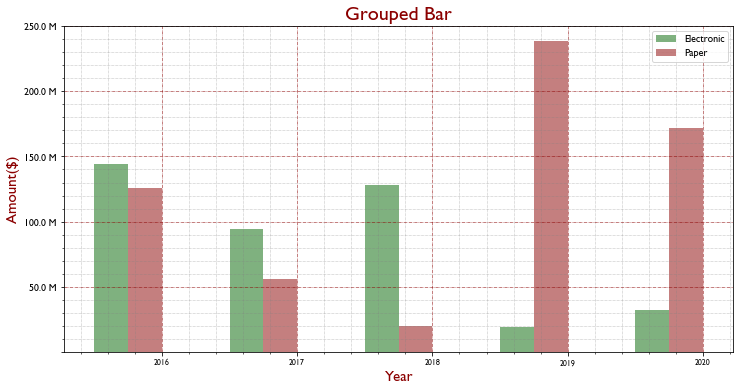

In [32]:
f, axe = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
viz.plot_grouped_bars(input_, 
                      ax=axe, 
                      title="Grouped Bar", 
                      xlabel="Year", 
                      ylabel="Amount($)", 
                      index_column="Year", 
                      bar_cols=['Electronic', 'Paper'], 
                      colors=['darkgreen', 'darkred'])